In [1]:
%pip install matplotlib

  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
from collections import Counter

# -----------------------------
# 1. Define Spanish Alphabet (27 letters)
# -----------------------------
SPANISH_ALPHABET = "ABCDEFGHIJKLMNÑOPQRSTUVWXYZ"
ALPH_LEN = len(SPANISH_ALPHABET)
print(ALPH_LEN)

27


In [ ]:
# 2. INPUT TEXT AND NORMALIZE IT
# -----------------------------

text = """Bajo el cielo de España diremos “sí, acepto”,
el tres de octubre sellamos nuestro amor perfecto.
Con el alma entrelazada y el corazón encendido,
me caso con el amor de mi vida, mi destino elegido."""
print(text)

def normalize(s):
    return "".join([c.upper() for c in s if c.upper() in SPANISH_ALPHABET])

plain = normalize(text)


Bajo el cielo de España diremos “sí, acepto”,
el tres de octubre sellamos nuestro amor perfecto.
Con el alma entrelazada y el corazón encendido,
me caso con el amor de mi vida, mi destino elegido.


In [8]:

# 3. CAESAR CIPHER (Spanish Alphabet)
# -----------------------------
def caesar_encrypt(text, shift=3):
    return "".join(
        SPANISH_ALPHABET[(SPANISH_ALPHABET.index(c) + shift) % ALPH_LEN]
        for c in text
    )

caesar = caesar_encrypt(plain, shift=3)

In [9]:
# 4. VIGENÈRE CIPHER (Spanish Alphabet)
# -----------------------------
def vigenere_encrypt(text, key):
    key = normalize(key)
    encrypted = []
    for i, c in enumerate(text):
        shift = SPANISH_ALPHABET.index(key[i % len(key)])
        encrypted.append(
            SPANISH_ALPHABET[(SPANISH_ALPHABET.index(c) + shift) % ALPH_LEN]
        )
    return "".join(encrypted)

vigenere = vigenere_encrypt(plain, key="LOVE")

In [ ]:
# 5. SIMPLE ENIGMA (Spanish Alphabet)
# -----------------------------
class Rotor:
    def __init__(self, wiring, notch, position='A'):
        self.wiring = wiring
        self.notch = notch
        self.position = position

    def encode_forward(self, c):
        idx = (SPANISH_ALPHABET.index(c) +
               SPANISH_ALPHABET.index(self.position)) % ALPH_LEN
        return self.wiring[idx]

    def encode_backward(self, c):
        idx = self.wiring.index(c)
        return SPANISH_ALPHABET[(idx -
               SPANISH_ALPHABET.index(self.position)) % ALPH_LEN]

    def step(self):
        pos = SPANISH_ALPHABET.index(self.position)
        self.position = SPANISH_ALPHABET[(pos + 1) % ALPH_LEN]
        return self.position == self.notch


class Reflector:
    def __init__(self, wiring):
        self.wiring = wiring

    def reflect(self, c):
        return self.wiring[SPANISH_ALPHABET.index(c)]


class Plugboard:
    def __init__(self, pairs):
        self.map = {c: c for c in SPANISH_ALPHABET}
        for a, b in pairs:
            self.map[a] = b
            self.map[b] = a

    def swap(self, c):
        return self.map[c]


# Example Swahili-compatible rotor wirings (24 letters)
rotor_I = Rotor("KLMNOPRSTUVWYZABCDEFGHIK", notch='P')
rotor_II = Rotor("RSTUVWYZABCDEFGHIKLMNOP", notch='U')
rotor_III = Rotor("UVWYZABCDEFGHIKLMNOPRST", notch='W')

# Simple reflector for 24 letters
reflector_B = Reflector("ZYWVUTSRPONMLKIHGFEDCBA")

# Plugboard example
plugboard = Plugboard([("A","M"),("E","U"),("I","S"),("O","W")])

def enigma_encrypt(text):
    encrypted = []
    for c in text:

        if rotor_III.step():
            if rotor_II.step():
                rotor_I.step()

        c = plugboard.swap(c)

        c = rotor_III.encode_forward(c)
        c = rotor_II.encode_forward(c)
        c = rotor_I.encode_forward(c)

        c = reflector_B.reflect(c)

        c = rotor_I.encode_backward(c)
        c = rotor_II.encode_backward(c)
        c = rotor_III.encode_backward(c)

        c = plugboard.swap(c)

        encrypted.append(c)

    return "".join(encrypted)

enigma = enigma_encrypt(plain)

# -----------------------------
# 6. FREQUENCY ANALYSIS
# -----------------------------
def letter_freq(text):
    counts = Counter(text)
    return [counts.get(SWAHILI_ALPHABET[i], 0) for i in range(ALPH_LEN)]

freq_plain = letter_freq(plain)
freq_caesar = letter_freq(caesar)
freq_vigenere = letter_freq(vigenere)
freq_enigma = letter_freq(enigma)

# -----------------------------
# 7. HISTOGRAMS
# -----------------------------
labels = list(SWAHILI_ALPHABET)

def plot_hist(freq, title):
    plt.figure(figsize=(10,4))
    plt.bar(labels, freq)
    plt.title(title)
    plt.xlabel("Letters")
    plt.ylabel("Frequency")
    plt.show()

plot_hist(freq_plain, "Original Swahili Text Frequency")
plot_hist(freq_caesar, "Caesar Cipher Frequency (Swahili Alphabet)")
plot_hist(freq_vigenere, "Vigenère Cipher Frequency (Swahili Alphabet)")
plot_hist(freq_enigma, "Enigma Cipher Frequency (Swahili Alphabet)")



Bajo el cielo de España diremos “sí, acepto”,
el tres de octubre sellamos nuestro amor perfecto.
Con el alma entrelazada y el corazón encendido,
me caso con el amor de mi vida, mi destino elegido.


NameError: name 'SWAHILI_ALPHABET' is not defined

Clean text:
 BAJOELCIELODEESPAÑADIREMOSSIACEPTOELTRESDEOCTUBRESELLAMOSNUESTROAMORPERFECTOCONELALMAENTRELAZADAYELCORAZONENCENDIDOMECASOCONELAMORDEMIVIDAMIDESTINOELEGIDO


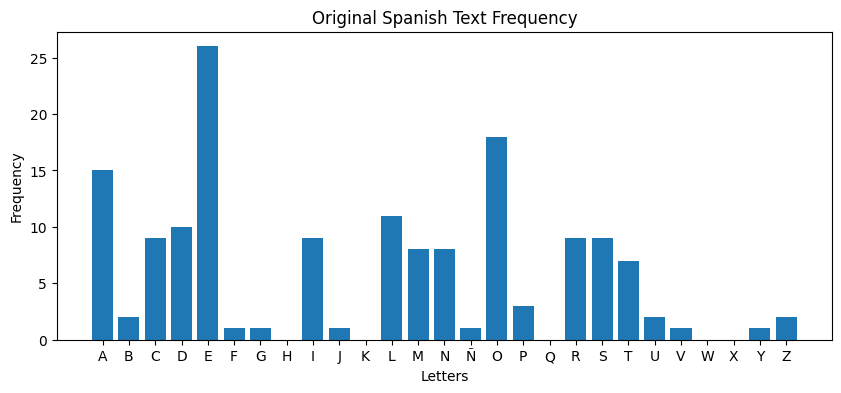

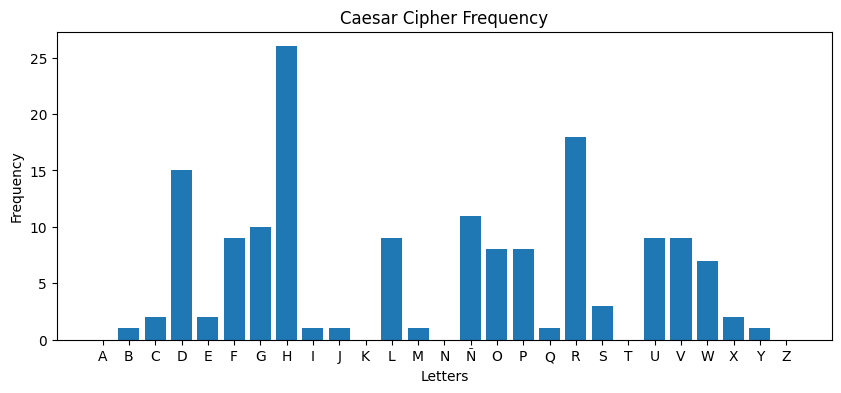

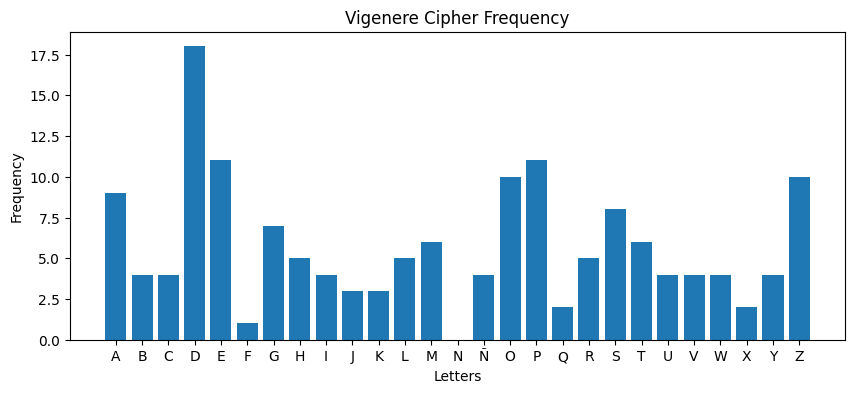

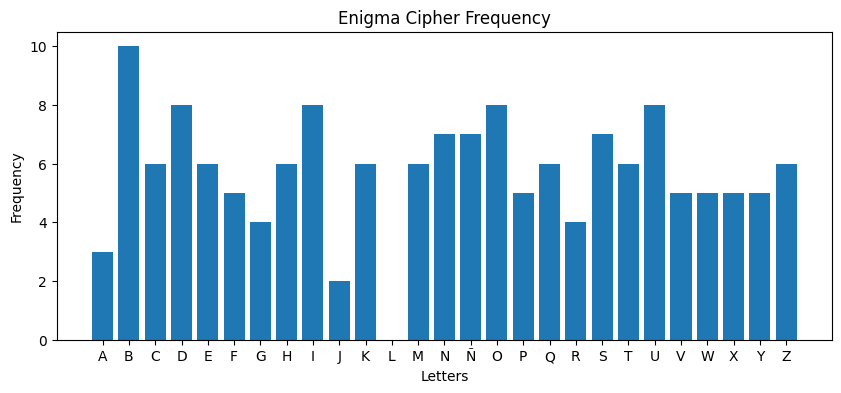

In [11]:
# ==========================================
# SPANISH CRYPTOGRAPHY HOMEWORK
# ==========================================

import matplotlib.pyplot as plt
from collections import Counter

# ------------------------------------------
# 1. SPANISH ALPHABET (27 letters)
# ------------------------------------------
SPANISH_ALPHABET = "ABCDEFGHIJKLMNÑOPQRSTUVWXYZ"
ALPH_LEN = len(SPANISH_ALPHABET)


# ------------------------------------------
# 2. ORIGINAL TEXT CLEANING
# ------------------------------------------

plain = """Bajo el cielo de España diremos sí acepto,
el tres de octubre sellamos nuestro amor perfecto.
Con el alma entrelazada y el corazón encendido,
me caso con el amor de mi vida mi destino elegido."""

# Convert to uppercase
plain = plain.upper()

# Remove accents
plain = plain.replace("Á","A").replace("É","E") \
             .replace("Í","I").replace("Ó","O") \
             .replace("Ú","U").replace("Ü","U")

# Keep only letters from Spanish alphabet
plain = "".join(c for c in plain if c in SPANISH_ALPHABET)

print("Clean text:\n", plain)


# ------------------------------------------
# 3. CAESAR CIPHER
# ------------------------------------------
def caesar_encrypt(text, shift):
    result = ""
    for c in text:
        idx = (SPANISH_ALPHABET.index(c) + shift) % ALPH_LEN
        result += SPANISH_ALPHABET[idx]
    return result

caesar = caesar_encrypt(plain, 3)


# ------------------------------------------
# 4. VIGENERE CIPHER
# ------------------------------------------
def vigenere_encrypt(text, key):
    result = ""
    key = key.upper()
    for i, c in enumerate(text):
        shift = SPANISH_ALPHABET.index(key[i % len(key)])
        idx = (SPANISH_ALPHABET.index(c) + shift) % ALPH_LEN
        result += SPANISH_ALPHABET[idx]
    return result

vigenere = vigenere_encrypt(plain, "AMOR")


# ------------------------------------------
# 5. SIMPLE ENIGMA (Spanish Alphabet)
# ------------------------------------------

class Rotor:
    def __init__(self, wiring, notch, position='A'):
        self.wiring = wiring
        self.notch = notch
        self.position = position

    def encode_forward(self, c):
        shift = SPANISH_ALPHABET.index(self.position)
        idx = (SPANISH_ALPHABET.index(c) + shift) % ALPH_LEN
        return self.wiring[idx]

    def encode_backward(self, c):
        shift = SPANISH_ALPHABET.index(self.position)
        idx = self.wiring.index(c)
        return SPANISH_ALPHABET[(idx - shift) % ALPH_LEN]

    def step(self):
        pos = SPANISH_ALPHABET.index(self.position)
        self.position = SPANISH_ALPHABET[(pos + 1) % ALPH_LEN]
        return self.position == self.notch


class Reflector:
    def __init__(self, wiring):
        self.wiring = wiring

    def reflect(self, c):
        return self.wiring[SPANISH_ALPHABET.index(c)]


# 27-letter rotor wirings (must be permutations!)
rotor_I = Rotor("EKMFLGDQVZNTOWYHXUSPAIBRCÑJ", notch='Q')
rotor_II = Rotor("AJDKSIRUXBLHWTMCQGZNPYFVOÑE", notch='E')
rotor_III = Rotor("BDFHJLCPRTXVZNYEIWGAKMUSQOÑ", notch='V')

reflector_B = Reflector("YRUHQSLDPXNGOKMIEBFZCWVJATÑ")

def enigma_encrypt(text):
    encrypted = []
    for c in text:

        if rotor_III.step():
            if rotor_II.step():
                rotor_I.step()

        c = rotor_III.encode_forward(c)
        c = rotor_II.encode_forward(c)
        c = rotor_I.encode_forward(c)

        c = reflector_B.reflect(c)

        c = rotor_I.encode_backward(c)
        c = rotor_II.encode_backward(c)
        c = rotor_III.encode_backward(c)

        encrypted.append(c)

    return "".join(encrypted)

enigma = enigma_encrypt(plain)


# ------------------------------------------
# 6. FREQUENCY ANALYSIS
# ------------------------------------------

def letter_freq(text):
    counts = Counter(text)
    return [counts.get(letter, 0) for letter in SPANISH_ALPHABET]

freq_plain = letter_freq(plain)
freq_caesar = letter_freq(caesar)
freq_vigenere = letter_freq(vigenere)
freq_enigma = letter_freq(enigma)


# ------------------------------------------
# 7. HISTOGRAMS
# ------------------------------------------

labels = list(SPANISH_ALPHABET)

def plot_hist(freq, title):
    plt.figure(figsize=(10,4))
    plt.bar(labels, freq)
    plt.title(title)
    plt.xlabel("Letters")
    plt.ylabel("Frequency")
    plt.show()

plot_hist(freq_plain, "Original Spanish Text Frequency")
plot_hist(freq_caesar, "Caesar Cipher Frequency")
plot_hist(freq_vigenere, "Vigenere Cipher Frequency")
plot_hist(freq_enigma, "Enigma Cipher Frequency")